In [1]:
import pandas as pd

In [2]:
#Проанализируйте ряды, сделайте их стационарными

In [3]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

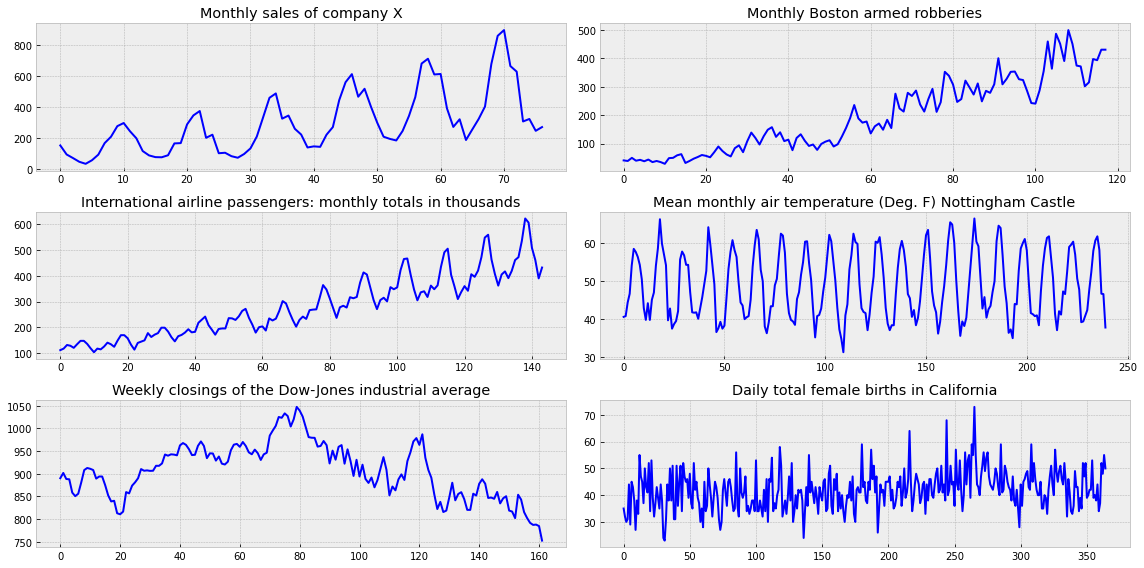

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [7]:
#Daily total female births in California is stationary, other time series need to be checked

In [8]:
#we can check if we have season in 'Mean monthly air temperature'

In [9]:
#Ищем сезонность

In [10]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

In [ ]:
plot_ts_and_points(mean_monthly_temp['Deg'], 2, 4)

In [12]:
#conclusion: we have something like a season

In [13]:
#Нормализуем дисперсию

In [14]:
#apply it to those time series, where we observe trends:
#Monthly sales of company X
#Monthly Boston armed robberies
#International airline passengers: monthly totals in thousands
#Weekly closings of the Dow-Jones industrial average

In [15]:
from scipy.stats import boxcox

In [16]:
#for monotonically changing variance we can apply boxcox (log)
series1 = boxcox(all_series["Monthly sales of company X"], 0)
series2 = boxcox(all_series["Monthly Boston armed robberies"], 0)
series3 = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)


In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series1, color='blue')
        plt.figure(figsize=(16, 8))
        plt.plot(series2, color='blue')
        plt.figure(figsize=(16, 8))
        plt.plot(series3, color='blue')
     

In [18]:
#Дифференцируем

In [19]:
import numpy as np

In [20]:
#to get rid of trends
series1 = np.diff(series1, 2)
series2 = np.diff(series2, 1)
series3 = np.diff(series3, 2)
series4 = np.diff(all_series["Weekly closings of the Dow-Jones industrial average"], 2)
series5 = np.diff(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 2)

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series1, color='blue')
        plt.figure(figsize=(16, 8))
        plt.plot(series2, color='blue')
        plt.figure(figsize=(16, 8))
        plt.plot(series3, color='blue')
        plt.figure(figsize=(16, 8))
        plt.plot(series4, color='blue')
        plt.figure(figsize=(16, 8))
        plt.plot(series5, color='blue')

In [22]:
#Тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

In [23]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [24]:
test_stationarity(series1)

Results of Dickey-Fuller Test:
Test Statistic                -7.101182e+00
p-value                        4.164137e-10
#Lags Used                     1.100000e+01
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


In [25]:
test_stationarity(series2)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


In [26]:
test_stationarity(series3)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


In [27]:
test_stationarity(series4)

Results of Dickey-Fuller Test:
Test Statistic                  -5.043437
p-value                          0.000018
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


In [28]:
test_stationarity(series5)

Results of Dickey-Fuller Test:
Test Statistic                -1.041098e+01
p-value                        1.804502e-18
#Lags Used                     1.500000e+01
Number of Observations Used    2.220000e+02
Critical Value (1%)           -3.460154e+00
Critical Value (5%)           -2.874649e+00
Critical Value (10%)          -2.573757e+00
dtype: float64


In [29]:
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


In [30]:
#check stationrity with figures

In [31]:
#Коррелограммы

In [32]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [33]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [ ]:
tsplot(series1)

In [ ]:
tsplot(series2)

In [ ]:
tsplot(series3)

In [ ]:
tsplot(series4)

In [ ]:
tsplot(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

In [39]:
#ACF is like a sinusoid, therefore can be considered as non stationary

In [ ]:
tsplot(series5)

In [41]:
#it is stationary

In [ ]:
tsplot(all_series["Daily total female births in California"])

In [43]:
#conculsion: all time series except of the last one was non stationary
#trends are removed and checked with ACF 